# Project - Loan Default Prediction (EDA & Lojistic Regression, Bi-Class Classification)

### Data Source: Kaggle

### Data Link- https://www.kaggle.com/kmldas/loan-default-prediction

### Data Shape: Rows = 10000, Column = 5

### Problem 1: Conduct an EDA to infer relation between different attributes, find dependecies and outhr useful insights.

### Problem 2: Make a machine learning model to predict if a person would be a loan defaulter or not. Explain, what factors makes a person a defaulter.

# Solution

### 1. Import necessary libraries and modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore") 

### 2. Import Your CSV file.

In [2]:
default = pd.read_csv("default.csv")

### 3. Do some basic analysis.

In [3]:
default.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted
0,1,yes,8754.36,532339.56,No
1,2,No,9806.16,145273.56,No
2,3,yes,12882.60,381205.68,No
3,4,yes,6351.00,428453.88,No
4,5,yes,9427.92,461562.00,No


In [4]:
default.shape

(10000, 5)

In [5]:
default.describe()

,Index,Bank Balance,Annual Salary
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,10024.498524,402203.782224
std,2886.89568,5804.579486,160039.674988
min,1.00000,0.000000,9263.640000
25%,2500.75000,5780.790000,256085.520000
50%,5000.50000,9883.620000,414631.740000
75%,7500.25000,13995.660000,525692.760000
max,10000.00000,31851.840000,882650.760000


In [6]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  object 
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted      10000 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


### 3. Checking the missing values.

In [7]:
default.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted        0
dtype: int64

#### It seems that there is no null values for any attribute, but what if there were any? In that case those null values need to be processed. There are two ways through which null values could be treated. The first is to delete all rows with null values if the number rows with null values is negligibly less.
The command goes as follows: default = default.dropna(inplace=True)
#### And the second way is to fill the null values (if numerical and non-negligible) with mean or media. With mean if data is evenly distributed and with median if the data has oulliers because oultiles my affect the mean significantly.
The command goes as follows:

default["Attribute1"] = default["Attribute1"].fillna(default["Attribute1"].mean())

default["Attribute2"] = default["Attribute2"].fillna(default["Attribute2"].median())

#### Now recheck if there is no null values remaining. 

In [8]:
default.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted        0
dtype: int64

#### Now drop the unnecessary column, like here the "Index" column is not at all required. It is of no significance statistically. 

In [9]:
default2 = default.drop("Index", axis=1)

In [10]:
default2.head()

,Employed,Bank Balance,Annual Salary,Defaulted
0,yes,8754.36,532339.56,No
1,No,9806.16,145273.56,No
2,yes,12882.60,381205.68,No
3,yes,6351.00,428453.88,No
4,yes,9427.92,461562.00,No


#### Now Check the Shape of the data set. You would see that some rows(with null values) has been dropped.

In [11]:
default2.shape

(10000, 4)

### 4. Do some EDA(if asked)

#### Do a comparision between different attributes Vs "Defaulted", to get an idea which attribute has strong relation the the defaulted status.


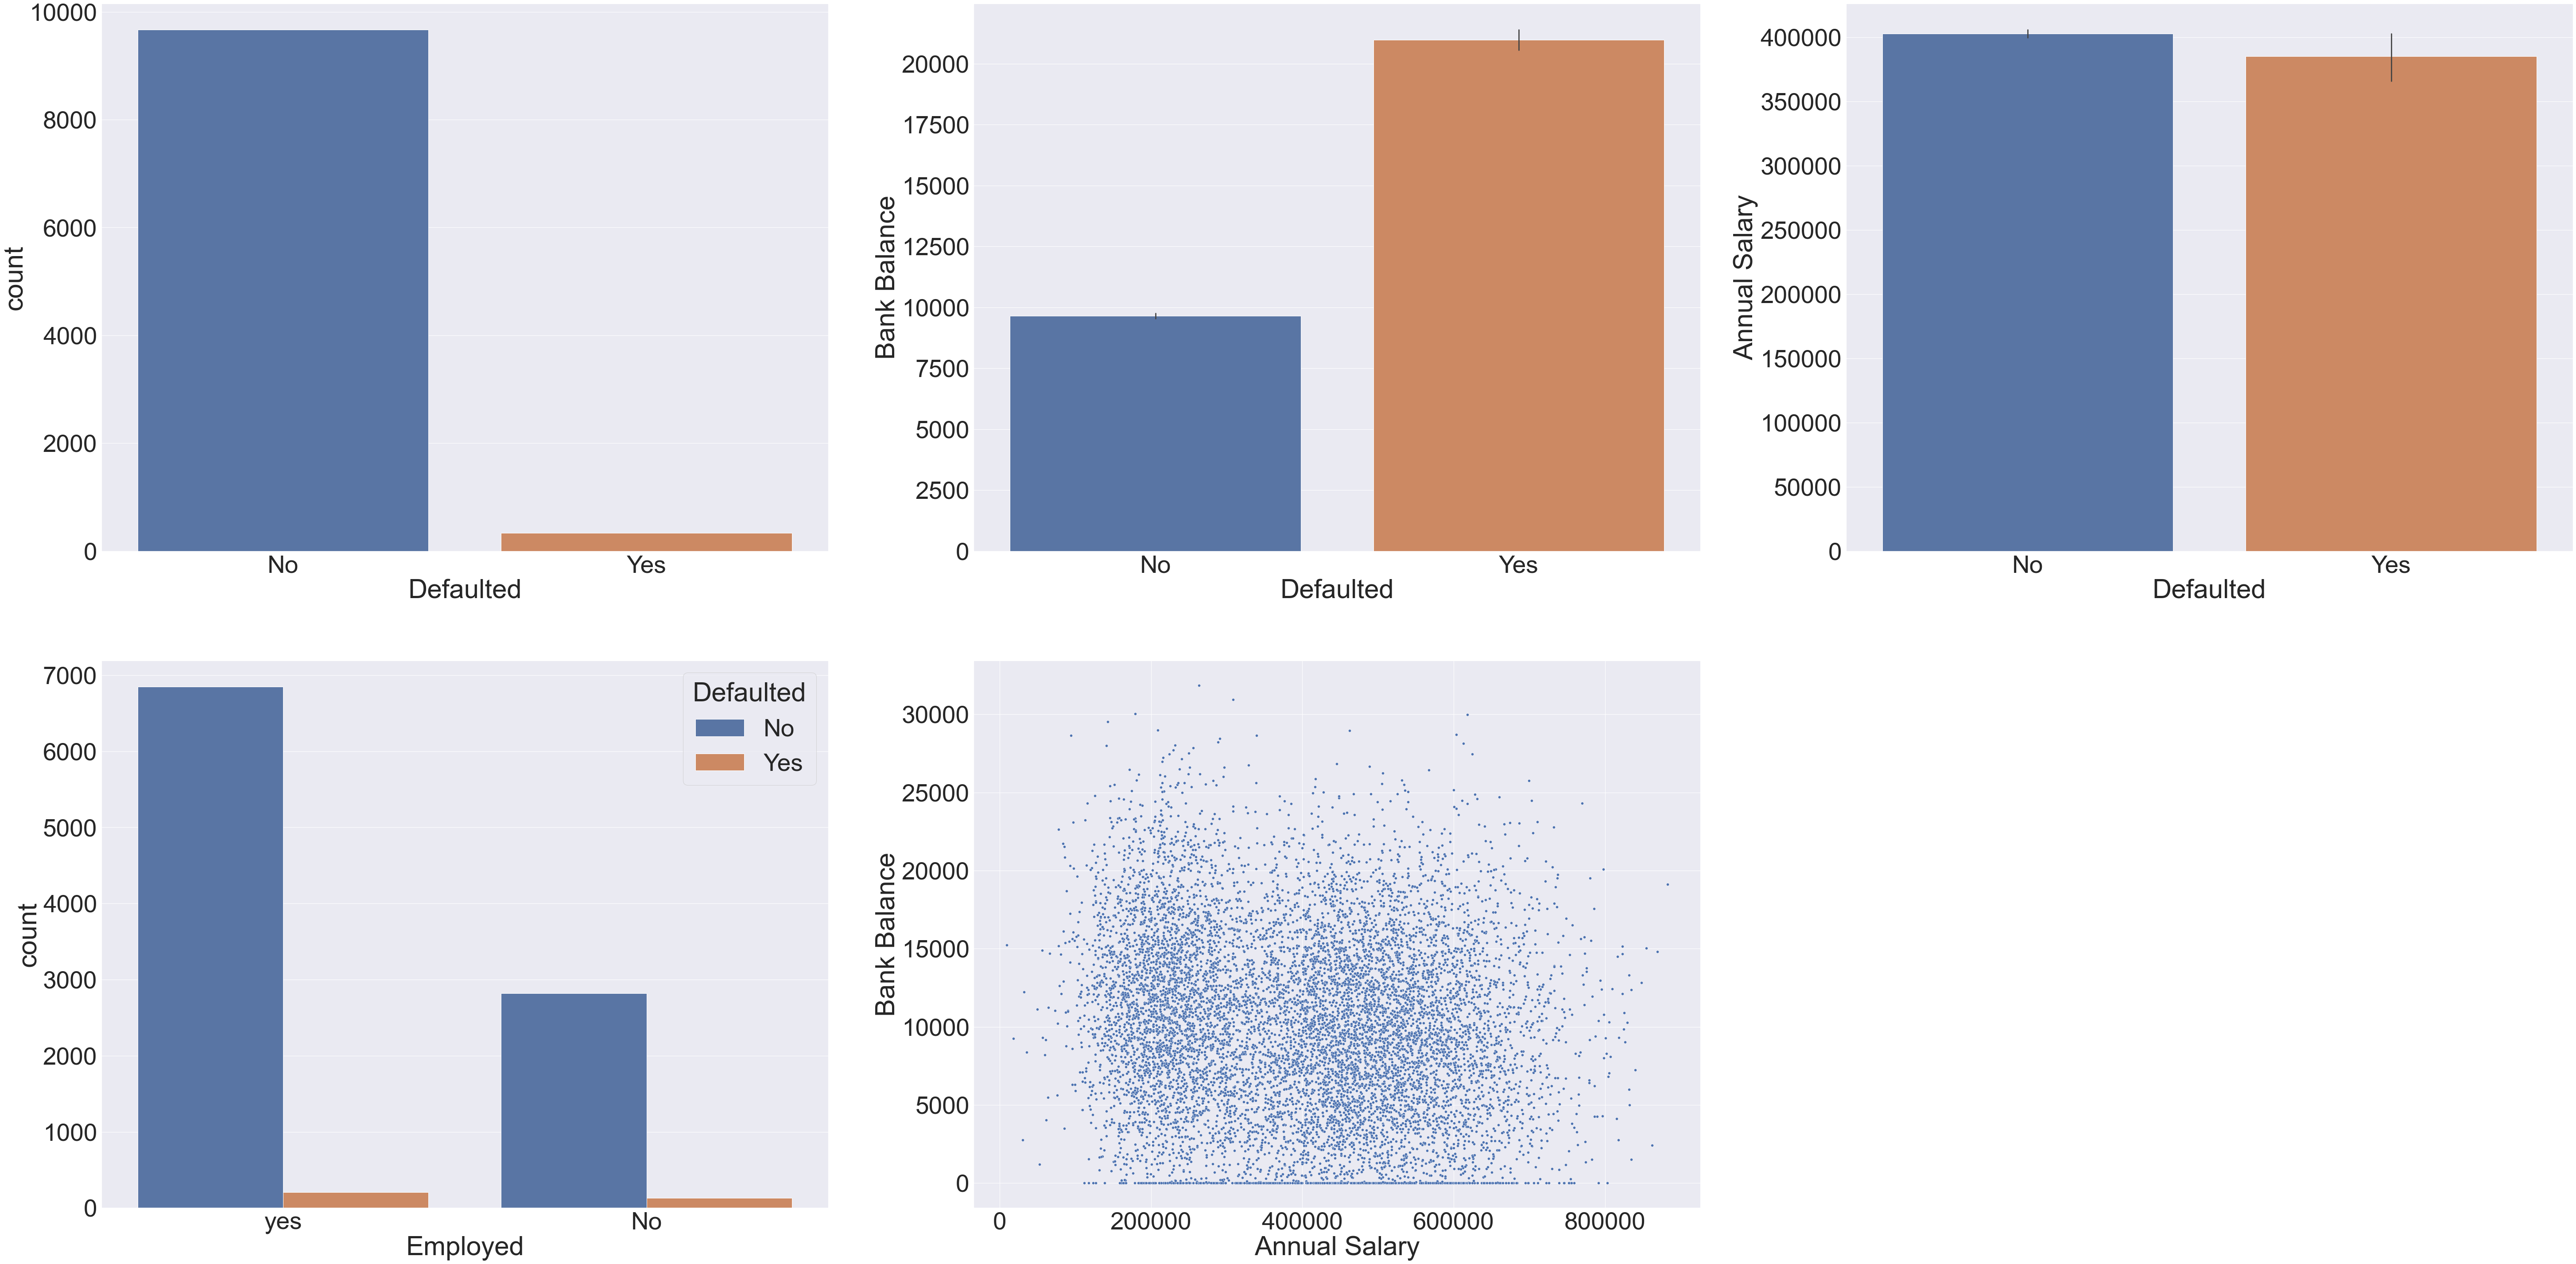

In [12]:
plt.figure(figsize=(100,50))
sns.set(font_scale = 5)

plt.subplot(2,3,1)
sns.countplot(default2["Defaulted"])

plt.subplot(2,3,2)
sns.barplot(default2["Defaulted"],default2["Bank Balance"])

plt.subplot(2,3,3)
sns.barplot(default2["Defaulted"],default2["Annual Salary"])

plt.subplot(2,3,4)
sns.countplot(default2["Employed"], hue = default2["Defaulted"])

plt.subplot(2,3,5)
sns.scatterplot(default2["Annual Salary"],default2["Bank Balance"])

plt.show()

### 5. Inferences-


#### 1. (Figure 1) It is very much clear that the number of defaulters are far less that the non-defaulters. Which means most of the people who take loan they pay their loans.


In [13]:
default2["Defaulted"].value_counts()

No     9667
Yes     333
Name: Defaulted, dtype: int64

In [14]:
default2["Defaulted"].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: Defaulted, dtype: float64

#### Even when counted the number of non-defaulters was 9667 while defaulters was 333. It means that more than 96% of people pay their loans and only about 0.3% people fail to pay their loans.`4 

#### 2. (Figure 2) With high bank balance the number of defaulter increases and whith low bank balance number of defaulter decreases. This means that when people pay their loan their bank balance decreases, which is obvious.

#### 3. (Figure 3) Annual salary does not affects or has a negligible effect on default status. But a high salary affects default status negligibly. A very little portion of high salary people are defaulters.

#### 4. (Figure 4) Doesn't matter if anyone is employed or not, the number of defaulters remains very low. Means People tend to pay their loans more than often.  

#### 5. (Figure 5) There is no direct relation between Bank Balance and Annual Salary, but two rough clusters could be seen, one with low  Annual Salary and high Bank Balance and another with high Annual Salary and high Bank Balance.

### 6. Convert categorical values into numerical values. 

#### As we can see that some attributes have categorical values.Its good to convert them into numeric values for the algorithm to perform better.

In [15]:
default2.head()

,Employed,Bank Balance,Annual Salary,Defaulted
0,yes,8754.36,532339.56,No
1,No,9806.16,145273.56,No
2,yes,12882.60,381205.68,No
3,yes,6351.00,428453.88,No
4,yes,9427.92,461562.00,No


#### We have "Employed" and "Defaulter" with categorical values.

In [16]:
default2["Employed"].value_counts()

yes    7056
No     2944
Name: Employed, dtype: int64

In [17]:
default2["Defaulted"].value_counts()

No     9667
Yes     333
Name: Defaulted, dtype: int64

#### Now Change the categorical values into numerical values.

In [18]:
default2.Employed=default2.Employed.map({"yes":1,"No":0})
default2["Employed"].value_counts()

1    7056
0    2944
Name: Employed, dtype: int64

In [19]:
default2.Defaulted=default2.Defaulted.map({"Yes":1,"No":0})
default2["Defaulted"].value_counts()

0    9667
1     333
Name: Defaulted, dtype: int64

#### Chaeck if categorical values have changes into numerical values or not.

In [20]:
default2.head()

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [21]:
default2.describe()

,Employed,Bank Balance,Annual Salary,Defaulted
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


### 7. Decide the independent and dependent variables.

#### In this case the independent variables would be "Employed", "Bank Balance" and "Annual Salary", where as "Defaulted" would obviously be the dependent variable.

### 8. Apply Logistic Regression Model

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x=default2.drop("Defaulted", axis=1)
y=default2["Defaulted"]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=21, stratify=y)

#### stratify = y
When we have an imbalanced data which means when categories (0/1,Yes/No) of dependent variable are very imbalanced, there is a cahnce of more from one categories goes into test or train data. In order to balance we stratify or test and train data. This ensures that both test and train data has equal percentage of both the categiries from the dependent variable,

In [25]:
print(x_train.shape)
print(x_test.shape)

(7000, 3)
(3000, 3)


In [26]:
print(y_train.value_counts(normalize=True).round(2))
print(" ")
print(y_test.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: Defaulted, dtype: float64
 
0    0.97
1    0.03
Name: Defaulted, dtype: float64


#### Both test and train data has 3% of defaulters (yes/1), thus stratify justified.

### 9. Apply SMOTE (If required)

#### SMOTE (Synthetic Monority Oversampling Technique) helps over sample the minority levels/category. In our case it is yes/1 defaulted category which is very less as compared to the no/0 non-defaulted category.

In [27]:
#conda install -c conda-forge imbalanced-learn

In [28]:
'''from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33, sampling_strategy=0.75)
x_resamp,y_resamp = sm.fit_sample(x_train,y_train)'''

'from imblearn.over_sampling import SMOTE\nsm = SMOTE(random_state=33, sampling_strategy=0.75)\nx_resamp,y_resamp = sm.fit_sample(x_train,y_train)'

### 10. Import the ML Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [32]:
lr.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred = lr.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
confusion_matrix(y_test,y_pred)

array([[2899,    1],
       [ 100,    0]], dtype=int64)

#### accuracy = Left Diagonal/Left Diagonal+Right Diagonal. Left diagonals are the correctly calssified values and right diagonals are the in-correctly classified values.

In [38]:
Accuracy = (2899+0)/(2899+0+100+1)

In [39]:
Accuracy

0.9663333333333334

#### Thus the accuracy is very good. The accuracy with SMOTE was some where around 72%, therefore I have decieded not to use smote, because it seems that minority class (Defaulted = yes/1) overslampling is not required. Even in real life defaulters are way less than non-defaulters therefore over sampling is not required.

#### The Defaulted status is heavily dependent on situations like, if the person is employed or not, bank balance of the person and also the annual salary of the person.